# Plucked string (fixed-fixed)

## Initial displacement

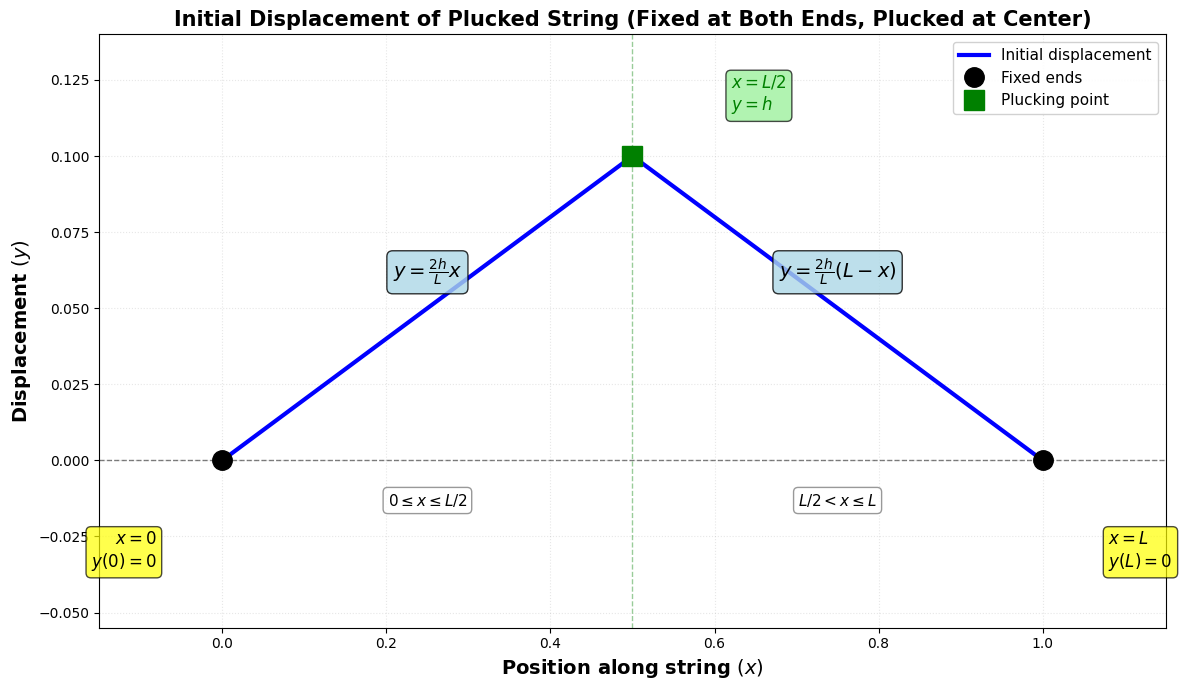

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of string
h = 0.1  # Plucking height
pluck_position = L/2  # Plucked at the center

# Create position array
x = np.linspace(0, L, 1000)

# Initial displacement - triangular shape
y = np.zeros_like(x)
for i, xi in enumerate(x):
    if xi <= pluck_position:
        y[i] = (2*h/L) * xi  # Region 1
    else:
        y[i] = (2*h/L) * (L - xi)  # Region 2

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the entire curve in single color
plt.plot(x, y, 'b-', linewidth=3, label='Initial displacement')

# Mark the boundary conditions (fixed ends)
plt.plot(0, 0, 'ko', markersize=14, label='Fixed ends', zorder=5)
plt.plot(L, 0, 'ko', markersize=14, zorder=5)

# Mark the plucking point
plt.plot(pluck_position, h, 'gs', markersize=14, label='Plucking point', zorder=5)

# Add annotations for boundary conditions
plt.annotate('$x = 0$\n$y(0) = 0$', xy=(0, 0), xytext=(-0.08, -0.035),
             fontsize=12, ha='right', color='black', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
plt.annotate('$x = L$\n$y(L) = 0$', xy=(L, 0), xytext=(L+0.08, -0.035),
             fontsize=12, ha='left', color='black', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
plt.annotate('$x = L/2$\n$y = h$', xy=(pluck_position, h), xytext=(pluck_position+0.12, h+0.015),
             fontsize=12, ha='left', color='green', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Add equation labels on the plot regions
plt.text(L/4, h/2 + 0.01, '$y = \\frac{2h}{L}x$', fontsize=14, ha='center',
         color='black', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.text(3*L/4, h/2 + 0.01, '$y = \\frac{2h}{L}(L-x)$', fontsize=14, ha='center',
         color='black', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Add region labels
plt.text(L/4, -0.015, '$0 \\leq x \\leq L/2$', fontsize=11, ha='center',
         color='black', style='italic',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(3*L/4, -0.015, '$L/2 < x \\leq L$', fontsize=11, ha='center',
         color='black', style='italic',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

# Add horizontal and vertical reference lines
plt.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)
plt.axvline(x=pluck_position, color='green', linestyle='--', linewidth=1, alpha=0.4)

# Labels and title
plt.xlabel('Position along string $(x)$', fontsize=14, fontweight='bold')
plt.ylabel('Displacement $(y)$', fontsize=14, fontweight='bold')
plt.title('Initial Displacement of Plucked String (Fixed at Both Ends, Plucked at Center)',
          fontsize=15, fontweight='bold')
plt.legend(loc='upper right', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
plt.xlim(-0.15, L+0.15)
plt.ylim(-0.055, h+0.04)

plt.tight_layout()
plt.show()


## Modal coefficients

FOURIER COEFFICIENTS FOR PLUCKED STRING
   n             A_n             B_n
------------------------------------------------------------
   1      0.08105695      0.00000000
   2      0.00000000      0.00000000
   3     -0.00900633      0.00000000
   4     -0.00000000      0.00000000
   5      0.00324228      0.00000000
   6      0.00000000      0.00000000
   7     -0.00165422      0.00000000
   8     -0.00000000      0.00000000
   9      0.00100070      0.00000000
  10      0.00000000      0.00000000
  11     -0.00066989      0.00000000
  12     -0.00000000      0.00000000
  13      0.00047963      0.00000000
  14      0.00000000      0.00000000
  15     -0.00036025      0.00000000
  16     -0.00000000      0.00000000
  17      0.00028047      0.00000000
  18      0.00000000      0.00000000
  19     -0.00022453      0.00000000
  20     -0.00000000      0.00000000


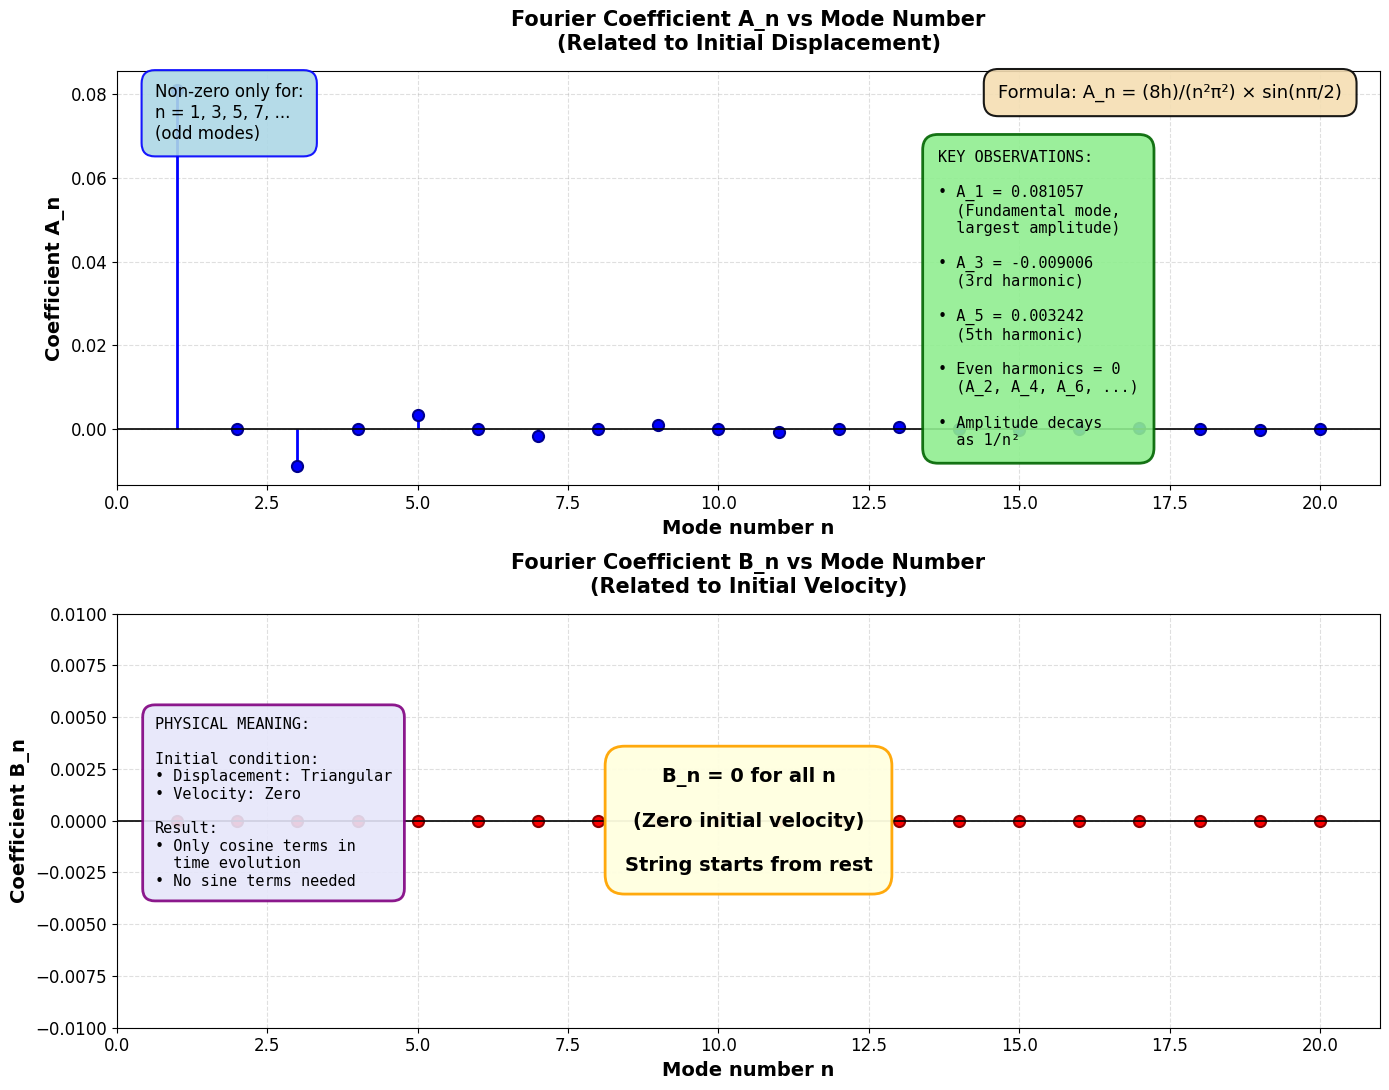

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of string
h = 0.1  # Plucking height
pluck_position = L/2  # Plucked at center
c = 1.0  # Wave speed

# Number of modes to compute
N_modes = 20

# Initialize arrays for coefficients
A_n = np.zeros(N_modes)
B_n = np.zeros(N_modes)

# Compute Fourier coefficients
for n in range(1, N_modes + 1):
    A_n[n-1] = (8*h/(n**2 * np.pi**2)) * np.sin(n*np.pi/2)
    B_n[n-1] = 0

# Print coefficients
print("="*60)
print("FOURIER COEFFICIENTS FOR PLUCKED STRING")
print("="*60)
print(f"{'n':>4} {'A_n':>15} {'B_n':>15}")
print("-"*60)
for i in range(N_modes):
    print(f"{i+1:4d} {A_n[i]:15.8f} {B_n[i]:15.8f}")
print("="*60)

# Create plots with better visibility
fig, axes = plt.subplots(2, 1, figsize=(14, 11))
n_values = np.arange(1, N_modes + 1)

# Plot A_n coefficients
markerline1, stemline1, baseline1 = axes[0].stem(n_values, A_n, basefmt=' ')
stemline1.set_linewidth(2)
stemline1.set_color('blue')
markerline1.set_markersize(8)
markerline1.set_markerfacecolor('blue')
markerline1.set_markeredgecolor('darkblue')
markerline1.set_markeredgewidth(1.5)

axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1.2)
axes[0].set_xlabel('Mode number n', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Coefficient A_n', fontsize=14, fontweight='bold')
axes[0].set_title('Fourier Coefficient A_n vs Mode Number\n(Related to Initial Displacement)',
                  fontsize=15, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.4, linestyle='--', linewidth=0.8)
axes[0].set_xlim(0, N_modes + 1)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Add formula annotation
formula_text = 'Formula: A_n = (8h)/(n²π²) × sin(nπ/2)'
axes[0].text(0.97, 0.97, formula_text, transform=axes[0].transAxes,
            fontsize=13, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat',
                     edgecolor='black', linewidth=1.5, alpha=0.9))

# Add info text
info_text = 'Non-zero only for:\nn = 1, 3, 5, 7, ...\n(odd modes)'
axes[0].text(0.03, 0.97, info_text, transform=axes[0].transAxes,
            fontsize=12, verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue',
                     edgecolor='blue', linewidth=1.5, alpha=0.9))

# Add key observations in the empty area (right side)
key_obs_text = 'KEY OBSERVATIONS:\n\n' + \
               f'• A_1 = {A_n[0]:.6f}\n' + \
               '  (Fundamental mode,\n  largest amplitude)\n\n' + \
               f'• A_3 = {A_n[2]:.6f}\n' + \
               '  (3rd harmonic)\n\n' + \
               f'• A_5 = {A_n[4]:.6f}\n' + \
               '  (5th harmonic)\n\n' + \
               '• Even harmonics = 0\n' + \
               '  (A_2, A_4, A_6, ...)\n\n' + \
               '• Amplitude decays\n' + \
               '  as 1/n²'

axes[0].text(0.65, 0.45, key_obs_text, transform=axes[0].transAxes,
            fontsize=11, verticalalignment='center', horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=1.0', facecolor='lightgreen',
                     edgecolor='darkgreen', linewidth=2, alpha=0.9),
            family='monospace')

# Plot B_n coefficients
markerline2, stemline2, baseline2 = axes[1].stem(n_values, B_n, basefmt=' ')
stemline2.set_linewidth(2)
stemline2.set_color('red')
markerline2.set_markersize(8)
markerline2.set_markerfacecolor('red')
markerline2.set_markeredgecolor('darkred')
markerline2.set_markeredgewidth(1.5)

axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1.2)
axes[1].set_xlabel('Mode number n', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Coefficient B_n', fontsize=14, fontweight='bold')
axes[1].set_title('Fourier Coefficient B_n vs Mode Number\n(Related to Initial Velocity)',
                  fontsize=15, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.4, linestyle='--', linewidth=0.8)
axes[1].set_xlim(0, N_modes + 1)
axes[1].set_ylim(-0.01, 0.01)
axes[1].tick_params(axis='both', which='major', labelsize=12)

# Add info text for B_n (centered)
bn_text = 'B_n = 0 for all n\n\n(Zero initial velocity)\n\nString starts from rest'
axes[1].text(0.5, 0.5, bn_text, transform=axes[1].transAxes,
            fontsize=14, verticalalignment='center', horizontalalignment='center',
            bbox=dict(boxstyle='round,pad=1.0', facecolor='lightyellow',
                     edgecolor='orange', linewidth=2, alpha=0.95),
            fontweight='bold')

# Add physical meaning in the empty area
physical_text = 'PHYSICAL MEANING:\n\n' + \
                'Initial condition:\n' + \
                '• Displacement: Triangular\n' + \
                '• Velocity: Zero\n\n' + \
                'Result:\n' + \
                '• Only cosine terms in\n' + \
                '  time evolution\n' + \
                '• No sine terms needed'

axes[1].text(0.03, 0.75, physical_text, transform=axes[1].transAxes,
            fontsize=11, verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='lavender',
                     edgecolor='purple', linewidth=2, alpha=0.9),
            family='monospace')

plt.tight_layout()
plt.show()



## Complete solution for string vibration using n upto 20.
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
L = 1.0  # String length
h = 0.1  # Plucking height
c = 1.0  # Wave speed
N_modes = 100  # Number of modes (can be changed to any value: 2, 5, 10, 20, etc.)

# Spatial grid
x = np.linspace(0, L, 200)

# Compute Fourier coefficients
A_n = np.zeros(N_modes)
B_n = np.zeros(N_modes)

for n in range(1, N_modes + 1):
    A_n[n-1] = (8*h/(n**2 * np.pi**2)) * np.sin(n*np.pi/2)
    B_n[n-1] = 0  # Zero initial velocity

print("Fourier Coefficients:")
print("n  |  A_n        | B_n")
print("-" * 30)
for i in range(N_modes):
    print(f"{i+1:2d} | {A_n[i]:10.6f} | {B_n[i]:.1f}")

# Function to compute displacement at time t
def compute_displacement(x, t):
    y = np.zeros_like(x)
    for n in range(1, N_modes + 1):
        k_n = n * np.pi / L
        omega_n = k_n * c
        # y(x,t) = sum[(A_n*cos(omega_n*t) + B_n*sin(omega_n*t)) * sin(k_n*x)]
        y += (A_n[n-1] * np.cos(omega_n * t) + B_n[n-1] * np.sin(omega_n * t)) * np.sin(k_n * x)
    return y

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(x, compute_displacement(x, 0), 'b-', linewidth=2.5)
ax.plot([0, L], [0, 0], 'ko', markersize=10, label='Fixed ends')

ax.set_xlim(0, L)
ax.set_ylim(-0.5, 0.5)  # Fixed y-axis limits
ax.set_xlabel('Position x', fontsize=13, fontweight='bold')
ax.set_ylabel('Displacement y(x,t)', fontsize=13, fontweight='bold')
ax.set_title(f'Vibration of Plucked String (N={N_modes} modes)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)
ax.legend()

time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Animation parameters
T = 2 * L / c  # Fundamental period
num_frames = 100
time_array = np.linspace(0, 2*T, num_frames)

def animate(frame):
    t = time_array[frame]
    y = compute_displacement(x, t)
    line.set_ydata(y)
    time_text.set_text(f't = {t:.3f} s\nt/T = {t/T:.2f}')
    return line, time_text

# Create animation
anim = FuncAnimation(fig, animate, frames=num_frames, interval=50, blit=True, repeat=True)

# Display in Colab
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

# Struck string

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
L = 1.0  # String length
V0 = 0.25  # Strike amplitude (initial velocity)
x0 = L/2  # Strike position (center)
c = 1.0  # Wave speed
N_modes = 10  # Number of modes

# Spatial grid
x = np.linspace(0, L, 200)

# Compute Fourier coefficients
A_n = np.zeros(N_modes)
B_n = np.zeros(N_modes)

for n in range(1, N_modes + 1):
    k_n = n * np.pi / L
    omega_n = k_n * c

    # For struck string at center (x0 = L/2):
    A_n[n-1] = 0  # Zero initial displacement

    # B_n = (2*V0)/(L*omega_n) * sin(n*pi/2)
    # Simplified: B_n = (2*V0)/(n*pi*c) * sin(n*pi/2)
    B_n[n-1] = (2 * V0 / (L * omega_n)) * np.sin(n * np.pi / 2)

print("Fourier Coefficients for Struck String at Center:")
print("="*60)
print("Formula: B_n = (2*V0)/(n*π*c) × sin(n*π/2)")
print("="*60)
print("n  |  A_n        | B_n        | sin(n*π/2)")
print("-" * 60)
for i in range(min(10, N_modes)):
    sin_value = np.sin((i+1) * np.pi / 2)
    print(f"{i+1:2d} | {A_n[i]:10.6f} | {B_n[i]:10.6f} | {sin_value:10.1f}")
print("="*60)

# Function to compute displacement at time t
def compute_displacement(x, t):
    y = np.zeros_like(x)
    for n in range(1, N_modes + 1):
        k_n = n * np.pi / L
        omega_n = k_n * c
        # y(x,t) = sum[(A_n*cos(omega_n*t) + B_n*sin(omega_n*t)) * sin(k_n*x)]
        y += (A_n[n-1] * np.cos(omega_n * t) + B_n[n-1] * np.sin(omega_n * t)) * np.sin(k_n * x)
    return y

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(x, compute_displacement(x, 0), 'r-', linewidth=2.5, label='String displacement')
ax.plot([0, L], [0, 0], 'ko', markersize=10, label='Fixed ends')

# Add strike position marker
ax.axvline(x=x0, color='green', linestyle=':', linewidth=2, alpha=0.5, label=f'Strike point')

ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_xlabel('Position x', fontsize=13, fontweight='bold')
ax.set_ylabel('Displacement y(x,t)', fontsize=13, fontweight='bold')
ax.set_title(f'Vibration of Struck String at Center (N={N_modes} modes)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)

# Legend at bottom right (clear area)
ax.legend(loc='lower right', fontsize=10, framealpha=0.9)

# Time text box at top left
time_text = ax.text(0.02, 0.97, '', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.85))

# Info text box at top right
info_text = 'Initial Condition:\ny(x,0) = 0\ndy/dt(x,0) = V0δ(x-L/2)\n\nB_n ∝ 1/n × sin(nπ/2)\nOdd modes only'
ax.text(0.98, 0.97, info_text, transform=ax.transAxes, fontsize=10,
       verticalalignment='top', horizontalalignment='right',
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.85))

# Animation parameters
T = 2 * L / c
num_frames = 100
time_array = np.linspace(0, 2*T, num_frames)

def animate(frame):
    t = time_array[frame]
    y = compute_displacement(x, t)
    line.set_ydata(y)
    time_text.set_text(f't = {t:.3f} s\nt/T = {t/T:.2f}')
    return line, time_text

# Create animation
anim = FuncAnimation(fig, animate, frames=num_frames, interval=50, blit=True, repeat=True)

# Display in Colab
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.